# Data Analysis
***
*csv file:  "garments_worker_productivity.csv"*

*from: Productivity Prediction of Garment Employees. UCI Machine Learning Repository (2020)*


In [2]:
# Import Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Open csv file garments_worker_productivity.csv
file="garments_worker_productivity.csv"
df_garments=pd.read_csv(file)


In [4]:
# Dataset dimension 
print ("Dataset Dimensions:", df_garments.shape)
# find null values
df_garments.isnull().any()
# If we found any true value, que can apply sum() to see the amount 
df_garments.isnull().sum()

Dataset Dimensions: (1197, 15)


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

#### Drop column Wip (Work in progress)

Contain many nan values (506).

In [5]:
# There are 506 Missing values in wip. 
df_garments.drop("wip", axis=1, inplace=True)


In [6]:
df_garments.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

##### After check dtype of columns, the results are:

**Time**

- date, quarter, day : *type object*
- smv (Standard Minute Value, it is the allocated time for a task) (*type float64*) 
- over_time (Represents the amount of overtime by each team in minutes)(*type int64*)
- idle_time (The amount of time when the production was interrupted due to several reasons)(*type float64*) 

**Categorical Variables**

- department (*type object*)
- team (*type int64*) 
 
**Continous variable**

- targeted_productivity (*type float64*) 
- actual_productivity (*type float64*) 
- incentive (Represents the amount of financial incentive (in BDT)(*type int64*)
- idle_men(The number of workers who were idle due to production interruption)(*type int64*)
- no_of_style_change (Number of changes in the style of a particular product) (*type int64*)
- no_of_workers (Number of workers in each team)(*type float64*)

In [7]:
#Cast to int "no_of_workers"
df_garments["no_of_workers"]=df_garments["no_of_workers"].astype(int, copy=True)
#Lets see dataframe
df_garments.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382


##### Using describe function to obtain clearer idea of the distribution of  different variables. 

In [8]:
df_garments.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.551378,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.152559,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### Calculate the correlation between variables of type "int64" or "float64" using the method "corr".
"actual_productivity" and "incentive"

*Is the incentive a way to increase productivity*?



correlation between intensive and actual_productivity:                      incentive  actual_productivity
incentive             1.000000             0.076538
actual_productivity   0.076538             1.000000


(0.0, 1.7734181674593443)

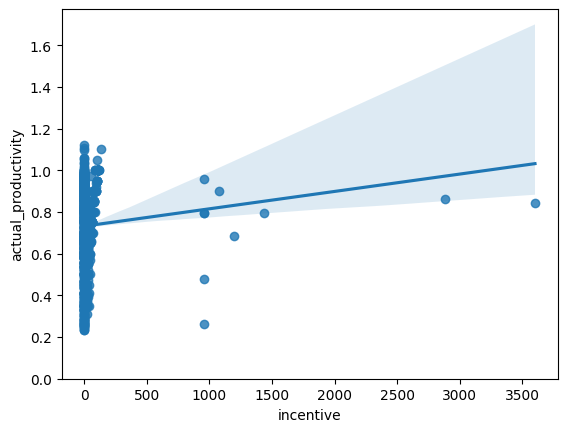

In [12]:

print ("correlation between intensive and actual_productivity:" , df_garments[["incentive", "actual_productivity"]].corr())
sns.regplot(x="incentive", y="actual_productivity", data=df_garments)
plt.ylim(0,)

*The correlation 0.07 mean a weak relation between incentive and productivity I can't affirm its important incentive to increase productivity*
Let's check the values of incentive

In [27]:
df_garments["incentive"].value_counts()

0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64

*There are 604 values equal to 0, which does NOT make it representative for this work

In [ ]:
df_garments.drop("incentive", axis=1, inplace=True)


Let's see the relationship between  idle_men and productivity

correlation between idle_men and actual_productivity:                      idle_men  actual_productivity
idle_men             1.000000            -0.181734
actual_productivity -0.181734             1.000000


(0.0, 1.1686235396727818)

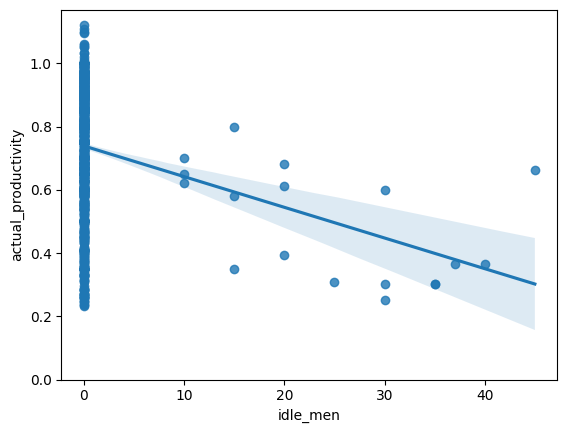

In [9]:
print ("correlation between idle_men and actual_productivity:" , df_garments[["idle_men", "actual_productivity"]].corr())
sns.regplot(x="idle_men", y="actual_productivity", data=df_garments)
plt.ylim(0,)

*The correlation -0.1 mean a weak relation between  idle_men and productivity*
Let's see the idle_men values in the dataset 



In [26]:
# In the graph we can see idle_men has only few values different from 0, let's check now
df_garments["idle_men"].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

*Conclusion: there are 1179 values equal 0 in idle_men, for the purpose of this work, don't need this data*

In [29]:
df_garments.drop("idle_men", axis=1, inplace=True)

Let's see the relationship between  no_of_workers and productivity

correlation between no_of_workers and actual_productivity:                      no_of_workers  actual_productivity
no_of_workers             1.000000            -0.058736
actual_productivity      -0.058736             1.000000


(0.0, 1.1647741012)

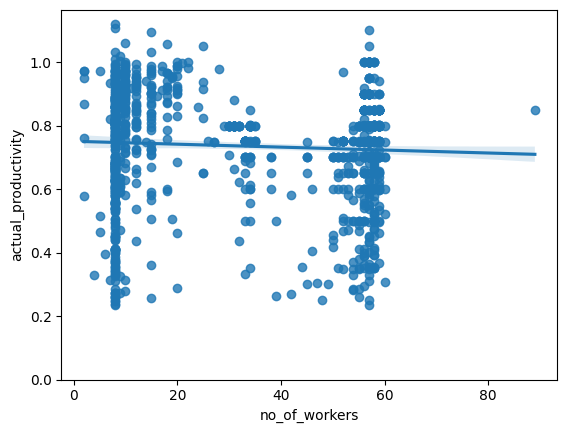

In [22]:
print ("correlation between no_of_workers and actual_productivity:" , df_garments[["no_of_workers", "actual_productivity"]].corr())
sns.regplot(x="no_of_workers", y="actual_productivity", data=df_garments)
plt.ylim(0,)

*The correlation -0.05 mean a weak relation between  idle_men and productivity*

In [25]:
#from scipy import stats
from scipy import stats

In [26]:
pearson_coef, p_value = stats.pearsonr(df_garments['incentive'], df_garments['actual_productivity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.07653762727386514  with a P-value of P = 0.008069571804676287


*the p-value is  0.008 < 0.05: there is moderate evidence that the correlation is significant.*

In [27]:
pearson_coef, p_value = stats.pearsonr(df_garments['no_of_workers'], df_garments['actual_productivity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.05873642102006847  with a P-value of P = 0.04217638936562941


*the p-value is  0.004 < 0.05: there is moderate evidence that the correlation is significant.*